# Virus Chino

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
mainpath = "C:/Users/Guany/Documents/"
filename = "Covid19casos.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-04-14
1,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-04-14
2,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-04-14
3,10000002,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-04-14
4,10000003,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2021-04-14


In [4]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,8.886341e+06,8.881943e+06,8.886341e+06,8.886341e+06,8.886341e+06,8.886341e+06
mean,5.674687e+06,3.922342e+01,2.492398e+01,2.302155e+01,2.431863e+01,1.902954e+02
std,2.751637e+06,1.822966e+01,1.764345e+01,2.916831e+01,2.943504e+01,2.483391e+02
min,6.720640e+05,-1.800000e+01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,3.305923e+06,2.600000e+01,8.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,5.687366e+06,3.700000e+01,2.200000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,8.052576e+06,5.100000e+01,4.200000e+01,3.400000e+01,3.800000e+01,3.710000e+02
max,1.040870e+07,2.210000e+02,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [5]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [6]:
VC["fecha_diagnostico"] = pd.to_datetime(VC["fecha_diagnostico"])

In [7]:
pd.isnull(VC["edad"]).values.ravel().sum()

4398

In [8]:
VC["edad"].mean()

39.22341980803074

In [9]:
VC["edad"].describe()

count    8.881943e+06
mean     3.922342e+01
std      1.822966e+01
min     -1.800000e+01
25%      2.600000e+01
50%      3.700000e+01
75%      5.100000e+01
max      2.210000e+02
Name: edad, dtype: float64

In [10]:
VC.loc[737]

id_evento_caso                                 10000699
sexo                                                  M
edad                                                 36
edad_años_meses                                    Años
residencia_pais_nombre                        Argentina
residencia_provincia_nombre                Buenos Aires
residencia_departamento_nombre          Almirante Brown
carga_provincia_nombre                             CABA
fecha_inicio_sintomas                               NaN
fecha_apertura                               2021-04-08
sepi_apertura                                        14
fecha_internacion                                   NaN
cuidado_intensivo                                    NO
fecha_cui_intensivo                                 NaN
fallecido                                            NO
fecha_fallecimiento                                 NaN
asistencia_respiratoria_mecanica                     NO
carga_provincia_id                              

In [11]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [12]:
VC['sexo'].value_counts()

F     4573269
M     4216662
NR      96410
Name: sexo, dtype: int64

In [13]:
pd.isnull(VC["edad"]).values.ravel().sum()

4398

In [14]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [15]:
#VC[VC['edad'] >= 105] = int(VC["edad"].mean())
#VC[VC['edad'] < 0] = int(VC["edad"].mean())
VC.loc[VC['edad']  > 105, ["edad"]] = int(VC["edad"].mean())
VC.loc[VC['edad'] < 0 ,  ['edad']]= int(VC["edad"].mean())

In [16]:
VC["edad"].mean()

39.19720996527142

In [17]:
VC["edad_años_meses"].value_counts()

Años    8886341
Name: edad_años_meses, dtype: int64

In [18]:
VC[VC["edad_años_meses"] == 39]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


In [19]:
VC['edad'].value_counts()

29.0     223260
30.0     222003
32.0     212951
31.0     211104
34.0     210860
28.0     210154
33.0     206632
26.0     204157
27.0     203019
35.0     200637
39.0     197452
25.0     195315
38.0     190024
36.0     189953
41.0     189568
37.0     187804
24.0     186185
40.0     184379
42.0     180939
43.0     175518
23.0     172639
44.0     164259
22.0     160440
45.0     158332
46.0     151739
21.0     148895
47.0     140841
48.0     140417
49.0     138627
20.0     134422
          ...  
77.0      29270
78.0      27035
79.0      24997
0.0       24795
80.0      24112
81.0      22676
82.0      20412
83.0      19190
84.0      18156
85.0      17187
86.0      15720
87.0      14672
88.0      13756
89.0      12813
90.0      11796
91.0       9755
92.0       8340
93.0       7126
94.0       5609
95.0       4356
96.0       3409
97.0       2428
98.0       1841
99.0       1160
100.0       786
101.0       410
102.0       217
103.0       159
104.0        63
105.0        54
Name: edad, Length: 106,

In [20]:
VC['edad'].min()

0.0

In [21]:
VC['edad'].max()

105.0

In [22]:
VC["edad"].mode()

0    29.0
dtype: float64

Text(0.5,1,'Histograma de distribucion de pacientes covid por edad')

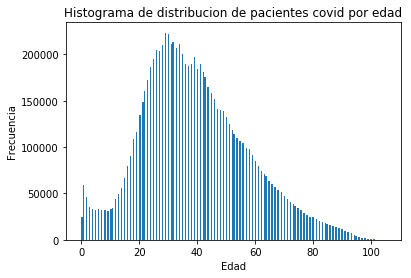

In [23]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de pacientes covid por edad")

In [24]:
VC["edad"].describe()

count    8.886341e+06
mean     3.919721e+01
std      1.825232e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.050000e+02
Name: edad, dtype: float64

Text(0.5,1,'Boxplot de pacientes por edad')

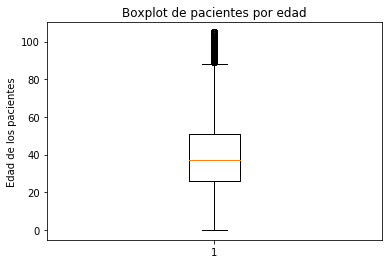

In [25]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de pacientes por edad")

In [26]:
VC["edad"].mode()

0    29.0
dtype: float64

In [27]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

Text(0.5,1,'Histograma de distribucion de pacientes covid por sexo')

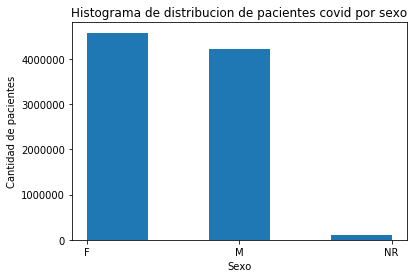

In [28]:
plt.hist(VC["sexo"], bins=5)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid por sexo")

In [29]:
VC["sexo"].value_counts()

F     4573269
M     4216662
NR      96410
Name: sexo, dtype: int64

In [30]:
confirmados = VC[["clasificacion_resumen", "fecha_diagnostico"]]

In [31]:
confirmados = confirmados.replace(to_replace="Confirmado", value=1)

In [32]:
confirmados.head(15)

,clasificacion_resumen,fecha_diagnostico
0,Descartado,2020-06-09
1,Descartado,2021-04-08
2,Descartado,2021-04-08
3,Descartado,2021-04-06
4,Descartado,2021-04-08
5,Descartado,2021-04-06
6,Descartado,2021-04-06
7,Descartado,2021-04-09
8,Descartado,2021-04-06
9,Descartado,2021-04-08


In [33]:
type(confirmados["clasificacion_resumen"][5])

str

In [34]:
type(confirmados["fecha_diagnostico"][5])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
confirmados = confirmados.dropna()

In [36]:
confirmados = confirmados[confirmados["clasificacion_resumen"]== 1]

In [37]:
#confirmados = confirmados.drop(labels=2192241, axis=0)
#confirmados = confirmados.drop(labels=2337905, axis=0)
#confirmados = confirmados.drop(labels=2440280, axis=0)
#confirmados = confirmados.drop(labels=4794269, axis=0)
#confirmados = confirmados.drop(labels=1619136, axis=0)
#confirmados = confirmados.drop(labels=6949111, axis=0)
confirmados = confirmados.drop(labels=1824030, axis=0)

In [38]:
confirmados = confirmados[confirmados["fecha_diagnostico"] > "2020-03-02"]

In [39]:
confirmados.sort_values("fecha_diagnostico")

,clasificacion_resumen,fecha_diagnostico
6239089,1,2020-03-03
6258696,1,2020-03-06
6280510,1,2020-03-06
6279984,1,2020-03-06
6289938,1,2020-03-06
6252075,1,2020-03-06
6270940,1,2020-03-06
6274413,1,2020-03-07
6379914,1,2020-03-08
6298480,1,2020-03-08


In [40]:
confirmados["fecha_diagnostico"] = pd.to_datetime(confirmados["fecha_diagnostico"])

In [41]:
type(confirmados["fecha_diagnostico"])

pandas.core.series.Series

In [42]:
confirmados["fecha_diagnostico"]

16        2021-04-08
27        2021-04-05
51        2021-04-10
60        2021-04-06
73        2020-06-25
76        2021-04-07
80        2021-04-08
83        2021-04-10
89        2021-04-09
92        2021-04-09
99        2021-04-13
105       2021-04-06
106       2020-06-01
109       2021-04-08
116       2021-04-08
128       2020-05-31
135       2021-04-07
153       2021-04-06
156       2021-04-07
160       2020-06-01
168       2021-04-09
174       2021-04-12
200       2021-04-09
206       2021-04-07
230       2021-04-08
234       2020-05-31
241       2021-04-08
255       2020-06-01
265       2020-06-01
268       2021-04-08
             ...    
8886158   2021-04-12
8886166   2021-04-09
8886181   2020-06-18
8886183   2021-04-07
8886185   2021-04-09
8886197   2021-04-07
8886202   2020-09-29
8886207   2021-04-09
8886217   2021-04-06
8886221   2021-04-10
8886232   2021-04-13
8886235   2020-06-01
8886243   2021-04-08
8886248   2021-04-08
8886252   2021-04-07
8886254   2021-04-08
8886262   202

In [43]:
confirmgroup = confirmados.groupby("fecha_diagnostico")

In [44]:
confirmgroup = confirmgroup.sum()

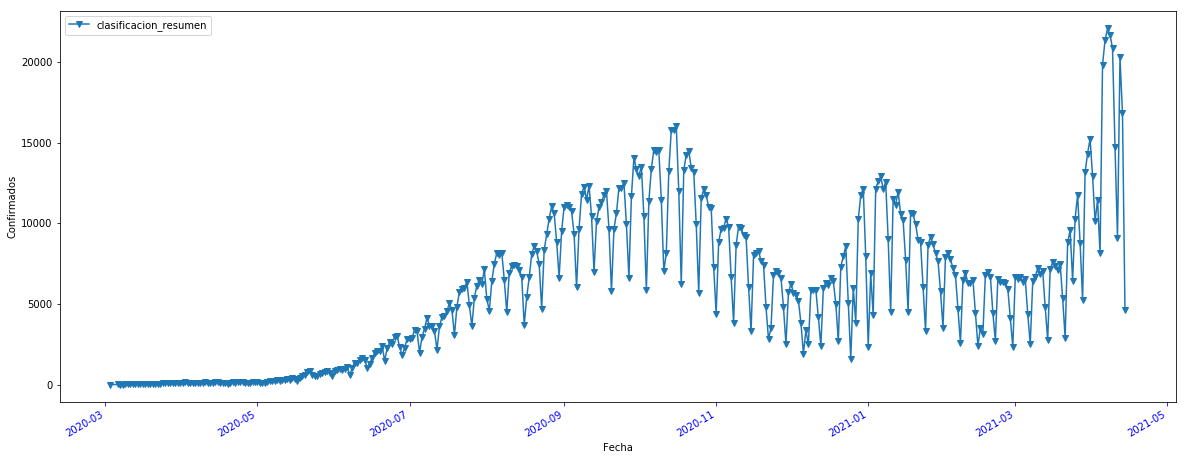

In [45]:
confirmgroup.plot(kind="line", y="clasificacion_resumen", figsize=(20,8), marker= "v")
#linestyle"--""
plt.xlabel("Fecha")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [46]:
confirmgroup.head()

,clasificacion_resumen
fecha_diagnostico,
2020-03-03,1
2020-03-06,6
2020-03-07,1
2020-03-08,2
2020-03-09,6


In [47]:
confirmgroup = confirmgroup.reset_index()

In [123]:
cont = 1
dataregresion = pd.DataFrame(columns=["Fecha", "Positivos", "Dia"])
dataregresion["Positivos"] = confirmgroup["clasificacion_resumen"]
dataregresion["Fecha"] = confirmgroup["fecha_diagnostico"]
dataregresion.reset_index()
for i in range (len(confirmgroup)):
    dataregresion["Dia"][i] = cont
    cont = cont + 1

C:\Users\Guany\.conda\envs\python-ml-2020\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
X_pred = dataregresion["Dia"]
X_pred = X_pred[:,np.newaxis]
Y = dataregresion["Positivos"]

In [126]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
lm.intercept_


672.2796569969005

In [128]:
lm.coef_

array([25.46217619])

In [129]:
lm.score(X_pred, Y)

0.40747685392254973

#### y = 1088.67 + 22.32 * dia

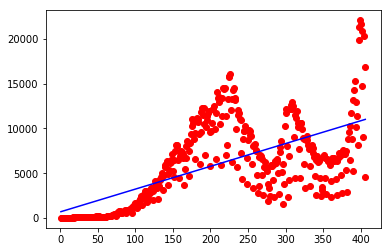

In [130]:
%matplotlib inline
plt.plot(X_pred,Y, "ro")
plt.plot(X_pred, lm.predict(X_pred), color="blue")

In [131]:
SSD = np.sum((Y - lm.predict(X_pred))**2)
RSE = np.sqrt(SSD/(len(X_pred)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(5257601114.422577, 3603.0169506571033, 5853.832512315271, 61.54971026378171)

#### intentando una cuadratica

In [132]:
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]
lm = LinearRegression()
lm.fit(X_data, Y)
lm.score(X_data, Y)

NameError: name 'X' is not defined

In [133]:
dataregresion.tail

<bound method NDFrame.tail of          Fecha  Positivos  Dia
0   2020-03-03          1    1
1   2020-03-06          6    2
2   2020-03-07          1    3
3   2020-03-08          2    4
4   2020-03-09          6    5
5   2020-03-10          9    6
6   2020-03-11          4    7
7   2020-03-12         10    8
8   2020-03-13          7    9
9   2020-03-14          7   10
10  2020-03-15         11   11
11  2020-03-16         10   12
12  2020-03-17         18   13
13  2020-03-18         29   14
14  2020-03-19         22   15
15  2020-03-20         30   16
16  2020-03-21         62   17
17  2020-03-22         54   18
18  2020-03-23         33   19
19  2020-03-24        105   20
20  2020-03-25        115   21
21  2020-03-26        110   22
22  2020-03-27         82   23
23  2020-03-28         69   24
24  2020-03-29        109   25
25  2020-03-30         84   26
26  2020-03-31         90   27
27  2020-04-01        120   28
28  2020-04-02        142   29
29  2020-04-03        102   30
..       

In [134]:
dataregresion_corto = dataregresion[(dataregresion["Fecha"]>"2021-03-18") & (dataregresion["Fecha"]<"2021-04-14")]

In [169]:
dataregresion_corto.tail(5)

,Fecha,Positivos,Dia
17,2021-04-08,21693,400
18,2021-04-09,20872,401
19,2021-04-10,14743,402
20,2021-04-12,20294,404
21,2021-04-13,16825,405


In [160]:
dataregresion_corto = dataregresion_corto.reset_index()

In [162]:
dataregresion_corto = dataregresion_corto.drop(labels="index", axis=1)

In [164]:
#X_data = dataregresion_corto["Dia"]
X_data =np.arange(0,len(dataregresion_corto))
X_data = X_data[:,np.newaxis]
Y = dataregresion_corto["Positivos"]

In [165]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

(5670.339920948617, array([747.95031056]), 0.7164636077777998)

#### Funcion y= 1701.28 + 68.153 + Dia Numero

In [167]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(196041823.0863919, 3055.3763939776395, 13523.818181818182, 22.592557463434236)

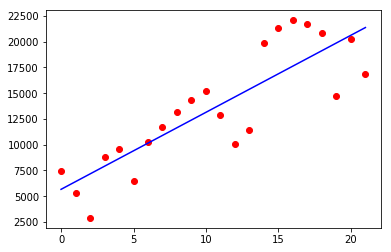

In [168]:
%matplotlib inline
plt.plot(X_data,Y, "ro")
plt.plot(X_data, lm.predict(X_data), color="blue")

In [156]:
dataregresion_corto[(dataregresion_corto["Dia"] > 387) & (dataregresion_corto["Positivos"] < 10000) ]

,Fecha,Positivos,Dia
8,2021-03-27,8775,388
9,2021-03-28,5242,389
16,2021-04-04,8139,396
23,2021-04-11,9082,403


In [158]:
#dataregresion_corto = dataregresion_corto.drop([8, 9, 16, 23]) #LIMPIANDO OUTLIERS